In [2]:
import sys
sys.path.append('../')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import networkit as nk
from tqdm import tqdm
import networkx as nx

from benji_girgs import generation, utils, plotting, fitting
import geopandas as gpd


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
n=2000
d=2
tau=2.5
alpha=1.3
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)
nk.overview(g)

def girg_gen_func(const):
    g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=const)
    return g

gcf = utils.GirgConstFitter(10.0, girg_gen_func)
gcf.verbose=True

Network Properties:
nodes, edges			2000, 38429
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.019224
clustering coefficient		0.426429
min/max/avg degree		8, 1962, 38.429000
degree assortativity		-0.109212
number of connected components	1
size of largest component	2000 (100.00 %)


In [25]:
gcf.step_n(15)

mu:83.65 -> mu2:77.43; overshoot: False, scale:0.429, const: 0.700
mu:76.43 -> mu2:47.85; overshoot: False, scale:0.612, const: 0.400
mu:49.45 -> mu2:24.67; overshoot: False, scale:0.875, const: 0.155
mu:25.12 -> mu2:5.47; overshoot: True, scale:0.612, const: 0.019
mu:5.67 -> mu2:10.72; overshoot: True, scale:0.429, const: 0.050
mu:11.07 -> mu2:7.08; overshoot: True, scale:0.300, const: 0.029
mu:9.16 -> mu2:9.33; overshoot: False, scale:0.429, const: 0.041
mu:10.48 -> mu2:5.65; overshoot: True, scale:0.300, const: 0.023
mu:6.62 -> mu2:7.84; overshoot: False, scale:0.429, const: 0.033
mu:7.81 -> mu2:13.05; overshoot: True, scale:0.300, const: 0.058
mu:12.87 -> mu2:9.30; overshoot: True, scale:0.210, const: 0.041
mu:9.05 -> mu2:12.48; overshoot: True, scale:0.147, const: 0.052
mu:11.20 -> mu2:10.56; overshoot: False, scale:0.210, const: 0.044
mu:10.76 -> mu2:8.98; overshoot: True, scale:0.147, const: 0.035
mu:9.10 -> mu2:10.81; overshoot: True, scale:0.103, const: 0.041


Calculating best minimal value for power law fit
powerlaw alpha: 2.719


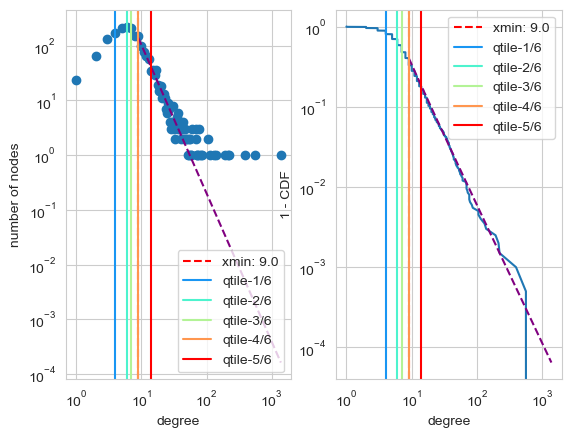

In [31]:
plotting.plot_degree_dist(g, vlines=6, pl_fit=True)

In [32]:
nk.overview(g)

Network Properties:
nodes, edges			2000, 11730
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.005868
clustering coefficient		0.439156
min/max/avg degree		1, 1375, 11.730000
degree assortativity		-0.113254
number of connected components	1
size of largest component	2000 (100.00 %)


In [33]:
edges = list(g.iterEdges())

In [21]:
import imp
import benji_girgs
imp.reload(benji_girgs)
imp.reload(benji_girgs.utils)
imp.reload(benji_girgs.fitting)
from benji_girgs import utils, fitting

<module 'benji_girgs' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/__init__.py'>

<module 'benji_girgs.utils' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/utils.py'>

<module 'benji_girgs.fitting' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py'>

In [93]:
n=2000
d=2
tau=2.5
alphas = 1.01, 1.1, 1.4, 2.5, 5.0
for alpha in alphas:
    for _ in range(2):
        g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)
        distances, std_distances, unique_dists, dist_counts, = fitting.graph_edge_removed_distances(g, 10000)
        # plt.plot(unique_dists, dist_counts, label=alpha)
        print(alpha)
        print(unique_dists)
        print(dist_counts)
        print(f'std_distances: {std_distances:.3f}, median_dist: {np.median(distances)}')
        

1.01
[2 3 4]
[7968 1992   40]
std_distances: 0.415, median_dist: 2.0
1.01
[2 3 4]
[8791 1205    4]
std_distances: 0.328, median_dist: 2.0
1.1
[ 2  3  4 -1]
[8978  995   24    3]
std_distances: 0.314, median_dist: 2.0
1.1
[ 2  3  4  5 -1]
[8478 1459   60    1    2]
std_distances: 0.382, median_dist: 2.0
1.4
[ 2  3  4  5  6 -1]
[8872  951   99    8    3   67]
std_distances: 0.375, median_dist: 2.0
1.4
[ 2  3  4  5  6 -1]
[7834 1480  443   79   16  148]
std_distances: 0.611, median_dist: 2.0
2.5
[ 2  3  4  5  6 -1]
[8840  372   58   17   14  699]
std_distances: 0.410, median_dist: 2.0
2.5
[ 2  3  4  5  6 -1]
[9035  272   39   16   12  626]
std_distances: 0.372, median_dist: 2.0
5.0
[ 2  3  4  5  7 -1]
[8557   95   16   28    2 1302]
std_distances: 0.406, median_dist: 2.0
5.0
[ 2  3  4  5  6 -1]
[8998   79   28   23   12  860]
std_distances: 0.376, median_dist: 2.0


In [95]:
n=2000
d=2
tau=2.5
alphas = 1.01, 1.1, 1.4, 2.5, 5.0
for alpha in alphas:
    for _ in range(2):
        g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)
        distances, std_distances, unique_dists, dist_counts, = fitting.graph_distances(g, 10000)
        # plt.plot(unique_dists, dist_counts, label=alpha)
        print(alpha)
        print(unique_dists)
        print(dist_counts)
        print(f'std_distances: {std_distances:.3f}, median_dist: {np.median(distances)}')
        

/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:114: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


1.01
[1 2 3 4]
[ 106 5671 4142   81]
std_distances: 0.530, median_dist: 2.0
1.01
[1 2 3 4 5]
[  78 1812 6989 1118    3]
std_distances: 0.564, median_dist: 3.0


/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py:87: RuntimeWarning: invalid value encountered in cast
  distances = np.array(np.nan_to_num(distances)).astype(np.int64)


1.1
[ 1  2  3  4  5 -1]
[  63 1627 6422 1845   28   15]
std_distances: 0.624, median_dist: 3.0
1.1
[1 2 3 4 5]
[  79 2607 6393  918    3]
std_distances: 0.593, median_dist: 3.0
1.4
[ 1  2  3  4  5  6 -1]
[  47 2148 5509 1891  208    9  188]
std_distances: 0.767, median_dist: 3.0
1.4
[ 1  2  3  4  5  6  7  8 -1]
[  46 1033 4860 3086  581   59   11    1  323]
std_distances: 0.890, median_dist: 3.0
2.5
[ 1  2  3  4  5  6  7  8  9 10 11 -1]
[  33  241 1106 2170 2018 1131  463  198   75   29   12 2524]
std_distances: 2.049, median_dist: 4.0
2.5
[ 1  2  3  4  5  6  7  8  9 11 -1]
[  18  577 2922 2817 1124  364  120   34    7    1 2016]
std_distances: 1.480, median_dist: 3.0
5.0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 -1]
[  17  162  882 1498 1219  643  297  151   74   49   29   17    7    4
 4951]
std_distances: 2.238, median_dist: 2.0
5.0
[ 1  2  3  4  5  6  7  8  9 10 12 -1]
[  16  397 1380 1530  824  349  131   44   10    3    1 5315]
std_distances: 1.728, median_dist: 1.0


In [96]:
n=2000
d=2
tau=2.5
alphas = 1.01, 1.1, 1.4, 2.5, 5.0
for alpha in alphas:
    for _ in range(3):
        g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)
        distances, std_distances, unique_dists, dist_counts, = fitting.graph_distances(g, 10000)
        # plt.plot(unique_dists, dist_counts, label=alpha)
        print(f'alpha: {alpha}')
        # print(unique_dists)
        # print(dist_counts)
        print(f'std_distances: {std_distances:.3f}, median_dist: {np.median(distances)}')
        

/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:114: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


alph: 1.01
std_distances: 0.535, median_dist: 3.0
alph: 1.01
std_distances: 0.524, median_dist: 3.0
alph: 1.01
std_distances: 0.560, median_dist: 3.0
alph: 1.1
std_distances: 0.587, median_dist: 3.0
alph: 1.1
std_distances: 0.610, median_dist: 3.0


/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py:87: RuntimeWarning: invalid value encountered in cast
  distances = np.array(np.nan_to_num(distances)).astype(np.int64)


alph: 1.1
std_distances: 0.589, median_dist: 3.0
alph: 1.4
std_distances: 0.636, median_dist: 3.0
alph: 1.4
std_distances: 0.860, median_dist: 3.0
alph: 1.4
std_distances: 0.795, median_dist: 3.0
alph: 2.5
std_distances: 1.289, median_dist: 3.0
alph: 2.5
std_distances: 1.514, median_dist: 3.0
alph: 2.5
std_distances: 2.152, median_dist: 4.0
alph: 5.0
std_distances: 2.055, median_dist: 3.0
alph: 5.0
std_distances: 2.261, median_dist: 3.0
alph: 5.0
std_distances: 1.349, median_dist: 3.0


/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:114: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py:87: RuntimeWarning: invalid value encountered in cast
  distances = np.array(np.nan_to_num(distances)).astype(np.int64)


alpha: 2.5
std_distances: 1.372, median_dist: 3.0
alpha: 2.5
std_distances: 0.896, median_dist: 3.0
alpha: 2.5
std_distances: 1.929, median_dist: 4.0
alpha: 2.5
std_distances: 0.866, median_dist: 3.0
alpha: 2.5
std_distances: 1.782, median_dist: 4.0
alpha: 5.0
std_distances: 1.754, median_dist: 3.0
alpha: 5.0
std_distances: 1.784, median_dist: 1.0
alpha: 5.0
std_distances: 2.686, median_dist: 1.0
alpha: 5.0
std_distances: 1.429, median_dist: 3.0
alpha: 5.0
std_distances: 1.931, median_dist: 2.0
alpha: 10.0
std_distances: 1.899, median_dist: 1.0
alpha: 10.0
std_distances: 1.943, median_dist: 1.0
alpha: 10.0
std_distances: 2.686, median_dist: 1.0
alpha: 10.0
std_distances: 1.557, median_dist: 2.0
alpha: 10.0
std_distances: 1.406, median_dist: 3.0
alpha: 20.0
std_distances: 2.507, median_dist: 1.0
alpha: 20.0
std_distances: 0.050, median_dist: 2.0
alpha: 20.0
std_distances: 1.141, median_dist: 2.0
alpha: 20.0
std_distances: 1.275, median_dist: 2.0
alpha: 20.0
std_distances: 2.169, median_

<AxesSubplot:xlabel='alpha', ylabel='std_distances'>

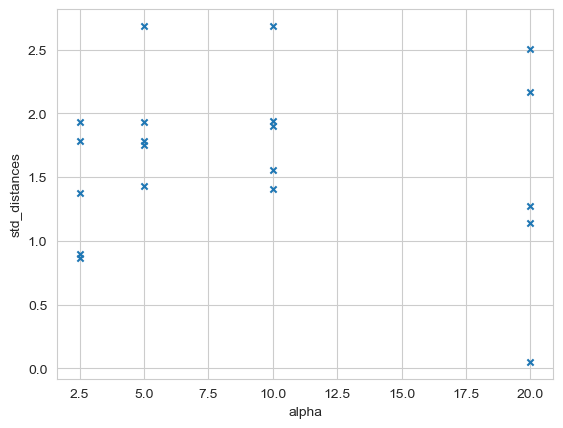

In [103]:
n=2000
d=2
tau=2.5
alphas = 2.5, 5.0, 10.0, 20.0
plot_pts = []
for alpha in alphas:
    for _ in range(5):
        g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)
        distances, std_distances, unique_dists, dist_counts, = fitting.graph_distances(g, 10000)
        # plt.plot(unique_dists, dist_counts, label=alpha)
        print(f'alpha: {alpha}')
        # print(unique_dists)
        # print(dist_counts)
        print(f'std_distances: {std_distances:.3f}, median_dist: {np.median(distances)}')
        plot_pts.append((alpha, std_distances))

df = pd.DataFrame(plot_pts, columns=['alpha', 'std_distances'])
df.plot.scatter(x='alpha', y='std_distances', marker='x')

        

In [8]:
n=2000
d=2
tau=2.5
alpha = 1.5
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)

In [9]:
unique_sizes, sizes_counts = fitting.biBFS_sample(g, 1000, use_tqdm=True)

100%|██████████| 1000/1000 [00:01<00:00, 524.82it/s]


In [10]:
unique_sizes

array([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  41,  42,
        44,  46,  48,  50,  52,  54,  59,  63,  65,  76, 152, 158, 164,
       338])

In [11]:
new_a, new_b, seen_a, seen_b, dist_a, dist_b, met = utils.bi_bfs(g, a, b)

array([419,   2,   2,  16,  25,  46,  34,  44,  51,  56,  46,  34,  38,
        26,  30,  20,   9,   8,   9,  10,  10,   3,   6,   6,   3,   2,
         3,   1,   4,   3,   1,   2,   2,   3,   2,   2,   1,   2,   1,
         1,   1,   3,   2,   1,   1,   1,   2,   1,   1,   1,   1,   1,
         1])

In [184]:
dists_a = utils.simple_bfs(g, 0, degree_thresh=None)
dists_b = utils.simple_bfs(g, 1, degree_thresh=None)

In [144]:
dist = 0
seen_a = set()
seen_b = set()
while True:
    new_a, new_b = dists_a[dist], dists_b[dist]
    if new_a.intersection(seen_b) or new_b.intersection(seen_a) or new_a.intersection(new_b):
        break
    seen_a.update(new_a)
    seen_b.update(new_b)
    dist += 1

In [156]:
[len(dists_a[i]) for i in range(len(dists_a))]
[len(dists_b[i]) for i in range(len(dists_b))]

[1, 4, 105, 503, 445, 153, 64, 30, 8, 4, 8, 3, 0]

[1, 6, 103, 550, 418, 149, 62, 23, 5, 8, 3, 0]

In [7]:
import imp
import benji_girgs
imp.reload(benji_girgs)
imp.reload(benji_girgs.utils)
imp.reload(benji_girgs.fitting)
from benji_girgs import utils, fitting

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_24167/852307102.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'benji_girgs' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/__init__.py'>

<module 'benji_girgs.utils' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/utils.py'>

<module 'benji_girgs.fitting' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py'>

In [181]:
new_a, new_b, seen_a, seen_b, dist_a, dist_b, got = utils.bi_bfs(g, 0, 1)

In [183]:
dist_a, dist_b

(2, 2)

In [187]:
dists_a[2].intersection(dists_b[2])

{237, 278, 311, 402, 881, 1065, 1314, 1500, 1758, 1961}

In [4]:
unique_sizes, sizes_counts = fitting.biBFS_sample(g, 1000, use_tqdm=True)

100%|██████████| 100/100 [00:00<00:00, 516.81it/s]

1670 719
349 600
1621 388
741 1138
437 1039
771 90
1564 583
1035 1601
389 566
131 1524
1865 108
891 770
491 548
562 555
867 441
1440 1625
1928 982
883 855
1049 1248
296 370
111 718
1844 438
1338 347
830 744
1120 15
422 1513
1811 378
15 1080
481 1816
1812 1531
1891 1
1090 1825
146 1350
811 996
466 1167
255 500
1585 565
187 666
815 432
1564 1731
1258 799
1475 1521
195 756
848 1456
68 405
1329 1193
1631 1893
1124 1216
1082 1645
987 607
37 1813
453 187
1675 617
430 309
1422 1803
936 335
185 341
861 1834
1172 1755
1376 1752
5 1289
1225 1054
553 1861
1545 313
182 252
945 1073
1015 1579
1687 215
1110 1231
135 1009
998 469
1246 786
664 1699
824 368
1104 1718
1248 996
1621 623
404 291
697 572
868 934
271 546
1725 642
1679 165
222 1171
438 1534
1592 79
1523 40
1660 1916
384 262
1101 1619
907 1524
962 1246
1056 265
236 1818
1376 1284
77 1406
1186 985
526 1054
1960 690
1934 461


In [5]:
unique_sizes

array([  2,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        20,  21,  23,  24,  26,  27,  29,  30,  36,  38,  45,  48,  55,
        94, 408, 531])

In [177]:
nk.overview(g)

Network Properties:
nodes, edges			2000, 2896
directed?			False
weighted?			False
isolated nodes			332
self-loops			0
density				0.001449
clustering coefficient		0.385318
min/max/avg degree		0, 230, 2.896000
degree assortativity		-0.062360
number of connected components	436
size of largest component	1328 (66.40 %)
